In [50]:
import scanpy as sc
import pandas as pd
from PyComplexHeatmap import *

In [33]:
sc.settings.figdir="../result/5.23_pesduotime/"

In [2]:
adata=sc.read("../../important_processed_data/5.22_integrate_adata.h5ad")

In [15]:
scMeta=pd.read_csv("../../important_processed_data/5.22_wt_integrate_meta.csv",index_col=0)

/tmp/ipykernel_319788/1610963072.py:1: DtypeWarning: Columns (12,17,18,19,21,22,23,26,29,84) have mixed types. Specify dtype option on import or set low_memory=False.
  scMeta=pd.read_csv("../../important_processed_data/5.22_wt_integrate_meta.csv",index_col=0)


In [16]:
adata.obs=scMeta

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


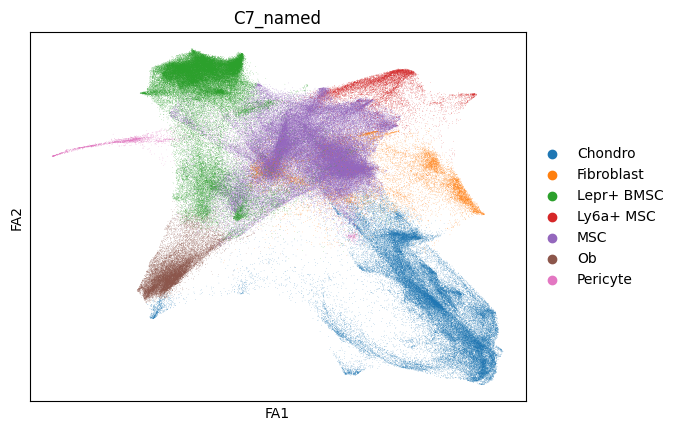

In [17]:
sc.pl.draw_graph(adata,color="C7_named")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


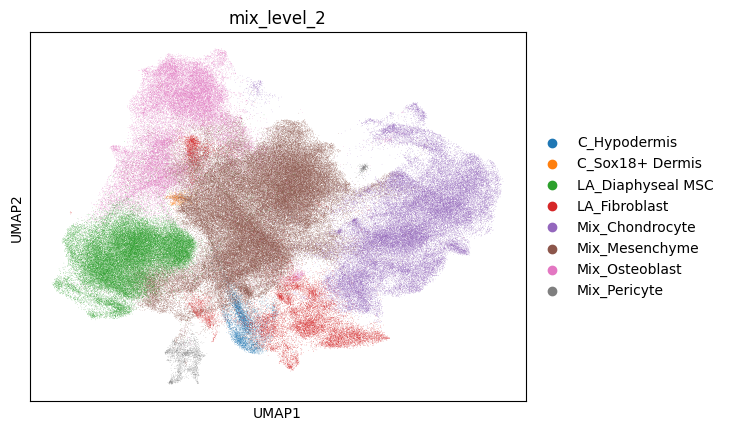

In [10]:
sc.pl.umap(adata,color="mix_level_2")

In [18]:
sc.tl.paga(adata,groups="C7_named")

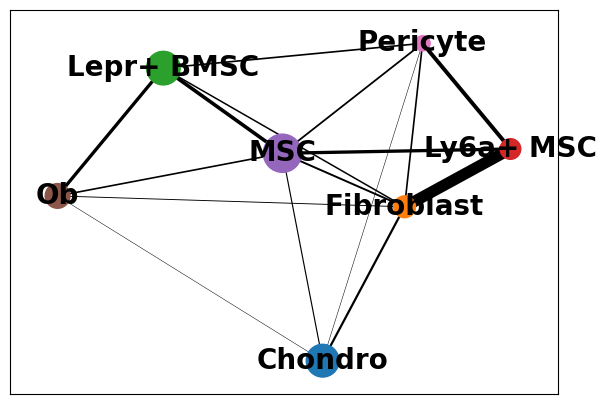

In [45]:
sc.pl.paga(adata,threshold=0.015,layout="fr",edge_width_scale=3,fontsize=20,node_size_scale=2,save="23.1.15_paga.pdf")

In [46]:
connectivePd=adata.uns["paga"]["connectivities"].toarray()
connectivePd=pd.DataFrame(connectivePd)

In [47]:
connectivePd=connectivePd.set_index(adata.obs["C7_named"].cat.categories)
connectivePd.columns=adata.obs["C7_named"].cat.categories

In [53]:
ObDf=pd.DataFrame(connectivePd.loc["Ob"])

In [59]:
ObDf=ObDf.drop("Ob",axis=0)

In [64]:
ObDf.columns[0]

'Ob'

In [65]:
ObDf= ObDf.sort_values(by="Ob", ascending=False)


In [66]:
ObDf

,Ob
Lepr+ BMSC,0.105582
MSC,0.052883
Fibroblast,0.028921
Chondro,0.015827
Pericyte,0.010343
Ly6a+ MSC,0.000000


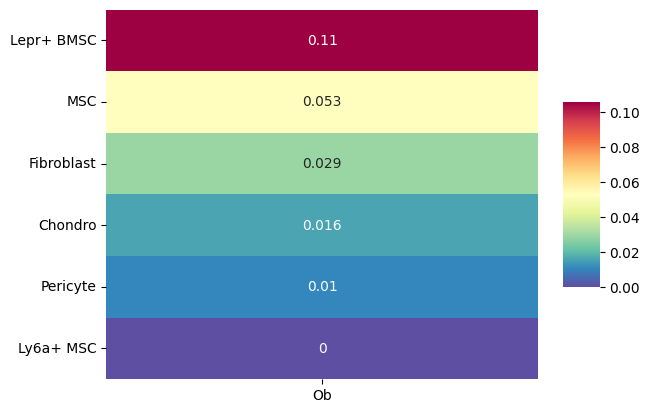

In [72]:
heatmap(ObDf,cmap="Spectral_r",linecolor = 'white',annot=True)
plt.savefig("../result/5.23_pesduotime/23.1.15_paga_hm.pdf")

Starting plotting..
Starting calculating row orders..
Reordering rows..


ValueError: The condensed distance matrix must contain only finite values.

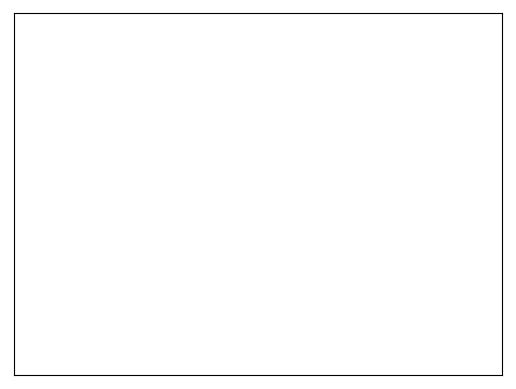

In [52]:
Heat(data=pd.DataFrame(connectivePd.loc["Ob"]),
                       linewidths=0.005,cmap="GnBu",linecolor = 'white',
                       show_rownames=True,show_colnames=True,legend_width=50)